# ⚖️ Tool for Computing Proximity Scores between Samples

In [1]:
# import packages
import scimap as sm
import anndata as ad

Running SCIMAP  1.3.14


In [2]:
# Load the data that we saved in the last tutorial (with ROIs added)
adata = ad.read_h5ad('/Users/aj/Dropbox (Partners HealthCare)/nirmal lab/resources/exemplarData/scimapExampleData/scimapExampleData.h5ad')

Quantifying the proximity score with `sm.tl.spatial_pscore` offers a systematic way to evaluate the closeness between specific cell types as defined by the user. 

This analysis generates two key metrics: the *Proximity Density* and the *Proximity Volume*, both of which are saved in `adata.uns`. 

**Proximity Density** reflects the ratio of identified interactions to the total number of cells of the interacting types, providing insight into how frequently these cell types interact relative to their population size. 

**Proximity Volume**, on the other hand, compares the number of interactions to the total cell count in the dataset, offering a broader view of the interaction's significance across the entire sample. 

Additionally, the locations of these interaction sites are recorded and saved in `adata.obs`, allowing for detailed spatial analysis. Running this analysis can elucidate the biological significance of the spatial arrangement of cell types, which is crucial for understanding tissue structure, function, and disease pathology in a more nuanced and quantitative manner.

In [3]:
# Calculate the score for proximity between `Tumor` cells and `Blood Vessels`
adata =  sm.tl.spatial_pscore (adata,proximity= ['ECAD+', 'SMA+'],
                               score_by = 'ROI',
                               phenotype='phenotype',
                               method='radius',
                               radius=50)

Identifying neighbours within 50 pixels of every cell
Please check:
adata.obs['spatial_pscore'] &
adata.uns['spatial_pscore'] for results


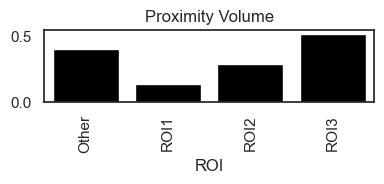

In [5]:
sm.pl.spatial_pscore (adata, color='black', plot_score='Proximity Volume', figsize=(4,2)) # 

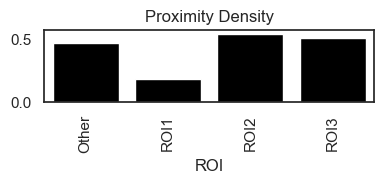

In [6]:
sm.pl.spatial_pscore (adata, color='Black', plot_score='Proximity Density', figsize=(4,2))

As previously noted, the locations of these interactions are recorded, enabling us to spatially plot and examine their distribution within the tissue.

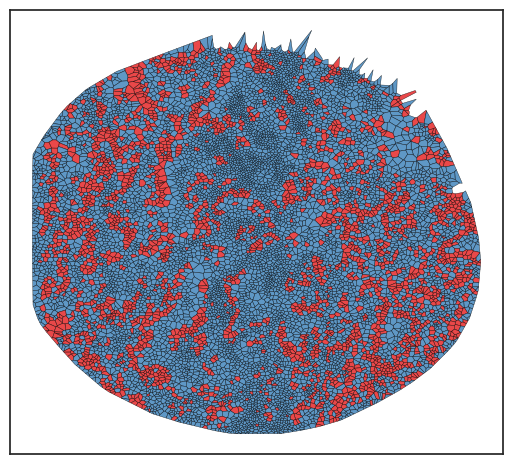

In [8]:
sm.pl.voronoi(adata, color_by='spatial_pscore', 
                 voronoi_edge_color = 'black',
                 size_max=3000,
                 voronoi_line_width = 0.3, 
                 voronoi_alpha = 0.8, 
                 overlay_points=None, 
                 plot_legend=True, 
                 legend_size=6)

### Save Results

In [9]:
# Save the results
adata.write('/Users/aj/Dropbox (Partners HealthCare)/nirmal lab/resources/exemplarData/scimapExampleData/scimapExampleData.h5ad')